<h1 style="text-align: center;">WSI - ćwiczenie 5. - Q-Learning</h1>

In [1]:
from q_learning import QLearning, calc_avrg_reward_per_100_episodes
from experiment_handler import ExperimentHandler
from matplotlib import pyplot as plt
import numpy as np

### 1. Stworzenie środowiska i trenowanie modelu:

In [13]:
EPISODES = 10000

q_learning_obj = QLearning(alpha=0.5, gamma=0.9, epsilon=1)
q_table, epsilons, rewards_per_episode = q_learning_obj.train(episodes=EPISODES)

avrg_rewards_per_100_episodes = calc_avrg_reward_per_100_episodes(rewards_per_episode)

### 2. Przedstawienie rezultatów na wykresach:

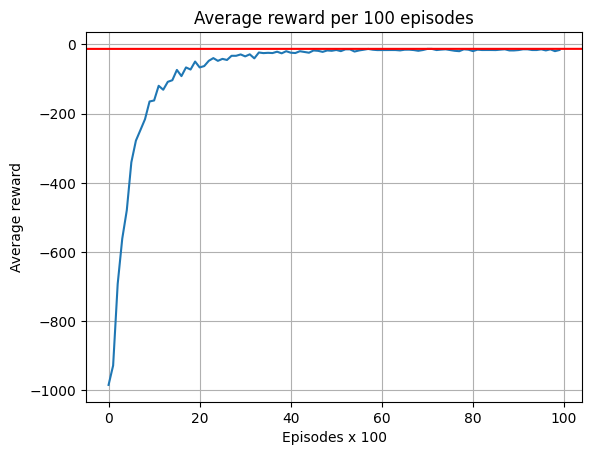

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(avrg_rewards_per_100_episodes)), avrg_rewards_per_100_episodes)
plt.ylabel('Average reward')
plt.title('Average reward per 100 episodes')
plt.grid()
plt.xlabel('Episodes x 100')
ax.add_artist(plt.Line2D((-13, EPISODES), (-13, 0), color='red'))
plt.show()

#### Wnioski:
 - Na podstwie wykresu widzimy, że z kolejnymi epokami śrendnia nagród na 100 epizodów rośnie, co świadczy o dobrym trenowaniu agenta

 - maksymalna suma nagród jaką może osiągnąć agent wynosi -13, widzimy, że po 4000 tysiącach epizodów średnia nagród na 100 epizodów jest bliska -13

 - wyniki pokazują, że algorytm Q-Learning znajduje najszybszą ale też najniebezpieczniejszą ścieżkę

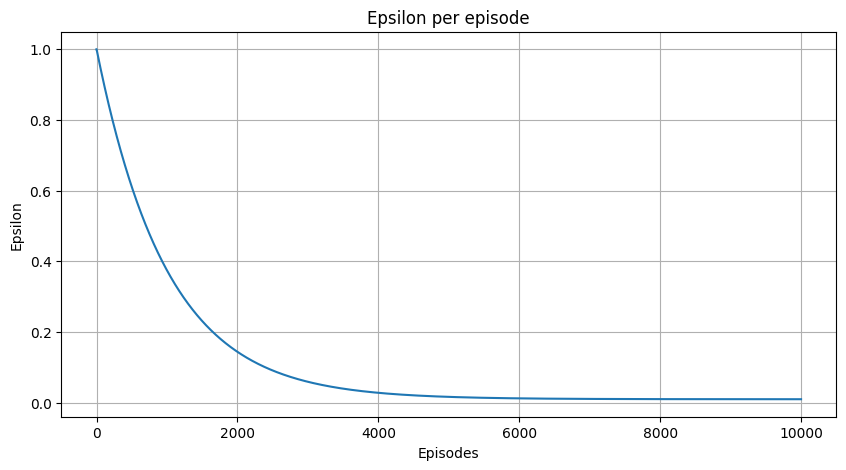

In [4]:
fig2 = plt.figure(figsize=(10, 5))
X = np.arange(EPISODES)
ax = fig2.add_subplot(111)
ax.plot(X, epsilons)
ax.set(xlabel='Episodes', ylabel='Epsilon', title='Epsilon per episode')
ax.grid()
plt.show()

#### Wnioseki:
 - powyższy wykres pokazuje jak zmienia się wartość parametru epsilon w kolejnych epokach

 - początkowo epsilon wynosi 1 - kiedy agent nie zna w ogóle środowiska chcemy aby eksplorował

 - wraz z kolejnymi epokami, epsilon spada coraz bliżej 0 - gdy już zna środowisko, chcemy, żeby je eksploatował

### 3. Badanie wpływu paramteru szybkości uczenia na algorytm

In [5]:
LEARNING_RATES = [0, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
DISCOUNT_FACTORS = [0, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

handler = ExperimentHandler(LEARNING_RATES, DISCOUNT_FACTORS)
results = handler.run_experiments_learning_rates()

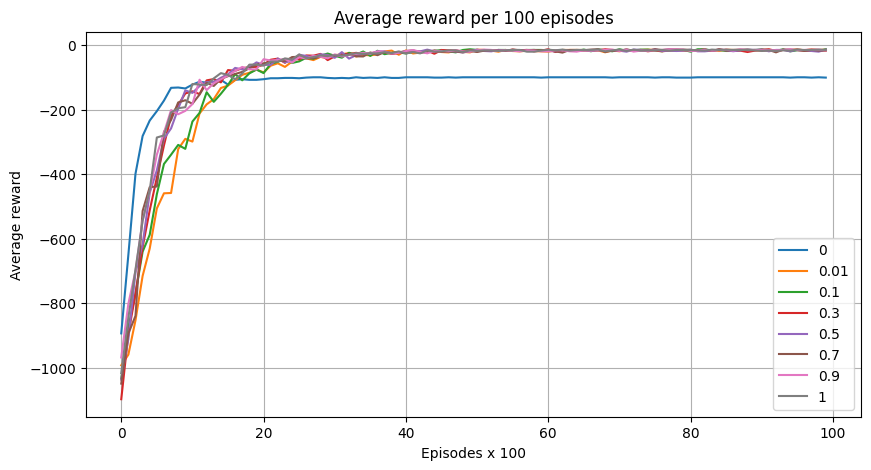

In [11]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for result in results:
    avrg_rewards = result.avrg_rewards_per_100_episodes
    ax.plot(np.arange(len(avrg_rewards)), avrg_rewards, label=result.alpha)
ax.set(xlabel='Episodes x 100', ylabel='Average reward', title='Average reward per 100 episodes')
ax.grid()
ax.legend()
plt.show()

#### Wnioski:
 - na podstawie wykresu widzimy, że dla prawie wszystkich wartości parametru szybkości uczenia algorytm poprawnie trenuje agenta, wyjątkiem jest wartość learning_rate = 0, dla której średnia wartość nagród na 100 epizodów początkowo najszybciej rośnie, natomiast od około 2000 epizodu zatrzymuje się w okolicach wartości -100 

### 4. Badanie wpływu współczynnika dyskontowania na działanie algorytmu

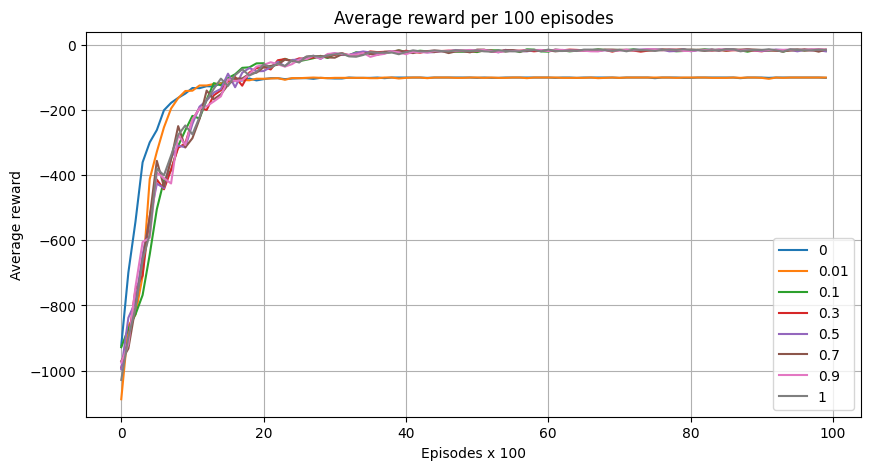

In [12]:
results = handler.run_experiments_discount_factors()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for result in results:
    avrg_rewards = result.avrg_rewards_per_100_episodes
    ax.plot(np.arange(len(avrg_rewards)), avrg_rewards, label=result.gamma)
ax.set(xlabel='Episodes x 100', ylabel='Average reward', title='Average reward per 100 episodes')
ax.grid()
ax.legend()
plt.show()

#### Wnioski:
 - Tutaj sytuacja ma się podobnie, dla większości wartości algorytm dobrze uczy agenta, wyjątkiem jest wartość gamma równa 0 i 0.01, podobnie jak przy badaniu wpływu paramteru szybkości uczenia, dla tych dwóch wartości średnia wartość nagród na 100 epizodów zatrzymuje się w okolicy -100 i dalej nie rośnie